# FEATURE SELECTION

# Import Packages and Data

In [1]:
%matplotlib inline
# Imports Packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
from sklearn import metrics

In [2]:
# Import data
NBE_df = pd.read_excel('ML_Model_Data_2021 - Copy.xls', sheet_name='Train')

#Filter Element Data
NBE_element_df = NBE_df[NBE_df['Steel_Element'] == 107]

# print(NBE_element_df)
NBE_element_df.head()

,Bridge_Number,Steel_Element,Coating_type,CS1,CS2,CS3,CS4,Maintenance responsibility,Bridge age,Average daily traffic,...,Operating rating,Inventory rating,Structural evaluation,Approach roadway alignment,Deck structure type,Type of wearing surface,Type of membrane,Deck protection type,Average daily truck traffic,Bridge condition
0,720544,107,8516,0.999574,0.000000,0.000426,0.000000,1,30,2701,...,0,0,7,8,1,0,0,1,3,3
1,870776,107,8516,1.000000,0.000000,0.000000,0.000000,1,30,21100,...,0,0,7,7,1,0,0,0,5,3
2,870313,107,8516,0.998227,0.001773,0.000000,0.000000,1,60,500,...,0,0,7,8,1,0,0,0,2,3
3,770048,107,8516,0.999934,0.000000,0.000000,0.000066,33,28,27400,...,0,0,7,8,1,0,0,0,12,3
4,940097,107,8516,1.000000,0.000000,0.000000,0.000000,1,44,32959,...,0,0,8,8,1,0,0,0,15,3


In [3]:
NBE_df.keys()

Index(['Bridge_Number', 'Steel_Element', 'Coating_type', 'CS1', 'CS2', 'CS3',
       'CS4', 'Maintenance responsibility', 'Bridge age',
       'Average daily traffic', 'Skew', 'Type of service on bridge',
       'Type of service under bridge',
       'Structure kind of material/design (Main)',
       'Structure type of design/construction (Main)',
       'Structure kind of material/design (Approach)',
       'Structure type of design/construction (Approach)', 'Deck condition',
       'Superstructure condition', 'Substructure condition',
       'Operating rating', 'Inventory rating', 'Structural evaluation',
       'Approach roadway alignment', 'Deck structure type',
       'Type of wearing surface', 'Type of membrane', 'Deck protection type',
       'Average daily truck traffic', 'Bridge condition'],
      dtype='object')

In [4]:
# Normalizing Data
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
scale_features = ['Bridge age', 'Average daily traffic', 'Skew',
       'Deck condition', 'Superstructure condition', 'Substructure condition',
       'Operating rating', 'Inventory rating', 'Structural evaluation',
       'Approach roadway alignment', 'Average daily truck traffic']
NBE_element_df.loc[:, scale_features] = ss.fit_transform(NBE_element_df.loc[:, scale_features])

In [5]:
NBE_element_df

,Bridge_Number,Steel_Element,Coating_type,CS1,CS2,CS3,CS4,Maintenance responsibility,Bridge age,Average daily traffic,...,Operating rating,Inventory rating,Structural evaluation,Approach roadway alignment,Deck structure type,Type of wearing surface,Type of membrane,Deck protection type,Average daily truck traffic,Bridge condition
0,720544,107,8516,0.999574,0.000000,0.000426,0.000000,1,0.271028,0.011584,...,0.000000,0.0,0.875,1.000000,1,0,0,1,0.078431,3
1,870776,107,8516,1.000000,0.000000,0.000000,0.000000,1,0.271028,0.090550,...,0.000000,0.0,0.875,0.833333,1,0,0,0,0.117647,3
2,870313,107,8516,0.998227,0.001773,0.000000,0.000000,1,0.551402,0.002137,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.058824,3
3,770048,107,8516,0.999934,0.000000,0.000000,0.000066,33,0.252336,0.117589,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.254902,3
4,940097,107,8516,1.000000,0.000000,0.000000,0.000000,1,0.401869,0.141448,...,0.000000,0.0,1.000,1.000000,1,0,0,0,0.313725,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,150133,107,8516,0.000000,0.000000,0.971440,0.028560,1,0.373832,0.045056,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.058824,3
768,124066,107,8516,0.000000,0.999882,0.000000,0.000118,2,0.280374,0.155787,...,0.666667,0.0,0.875,0.833333,1,6,0,0,0.098039,3
769,860467,107,8516,0.991166,0.000000,0.000848,0.007986,1,0.308411,0.051494,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.117647,3
770,150092,107,8516,1.000000,0.000000,0.000000,0.000000,1,0.429907,0.135186,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.098039,3


# Random Forest

In [6]:
# Identify Feature Importance for Random forest Regression
#NBI Dataset
X = NBE_element_df.loc[:,['Maintenance responsibility', 'Bridge age',
       'Average daily traffic', 'Skew', 'Type of service on bridge',
       'Type of service under bridge',
       'Structure kind of material/design (Main)',
       'Structure type of design/construction (Main)',
       'Structure kind of material/design (Approach)',
       'Structure type of design/construction (Approach)', 'Deck condition',
       'Superstructure condition', 'Substructure condition',
       'Operating rating', 'Inventory rating', 'Structural evaluation',
       'Approach roadway alignment', 'Deck structure type',
       'Type of wearing surface', 'Type of membrane', 'Deck protection type',
       'Average daily truck traffic', 'Bridge condition']]
Y = NBE_element_df.loc[:,['CS1', 'CS2','CS3','CS4']]

# Feature Selection
from sklearn.ensemble import RandomForestRegressor

# define the model
model_rfr = RandomForestRegressor()

# fit the model
model_rfr.fit(X, Y)

# get importance
importance = model_rfr.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04978
Feature: 1, Score: 0.20773
Feature: 2, Score: 0.17698
Feature: 3, Score: 0.08476
Feature: 4, Score: 0.06012
Feature: 5, Score: 0.07579
Feature: 6, Score: 0.03006
Feature: 7, Score: 0.00582
Feature: 8, Score: 0.02254
Feature: 9, Score: 0.01557
Feature: 10, Score: 0.01855
Feature: 11, Score: 0.00582
Feature: 12, Score: 0.01159
Feature: 13, Score: 0.01483
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.05977
Feature: 16, Score: 0.02776
Feature: 17, Score: 0.01675
Feature: 18, Score: 0.01620
Feature: 19, Score: 0.00016
Feature: 20, Score: 0.00650
Feature: 21, Score: 0.09286
Feature: 22, Score: 0.00000


In [7]:
#Sorting in ascending order
random_forest_regressor_feature_imp = pd.Series(model_rfr.feature_importances_,index=X.columns).sort_values(ascending=False)
random_forest_regressor_feature_imp 

Bridge age                                          0.207730
Average daily traffic                               0.176979
Average daily truck traffic                         0.092855
Skew                                                0.084758
Type of service under bridge                        0.075786
Type of service on bridge                           0.060117
Structural evaluation                               0.059768
Maintenance responsibility                          0.049780
Structure kind of material/design (Main)            0.030061
Approach roadway alignment                          0.027764
Structure kind of material/design (Approach)        0.022543
Deck condition                                      0.018553
Deck structure type                                 0.016747
Type of wearing surface                             0.016200
Structure type of design/construction (Approach)    0.015568
Operating rating                                    0.014834
Substructure condition  

No handles with labels found to put in legend.


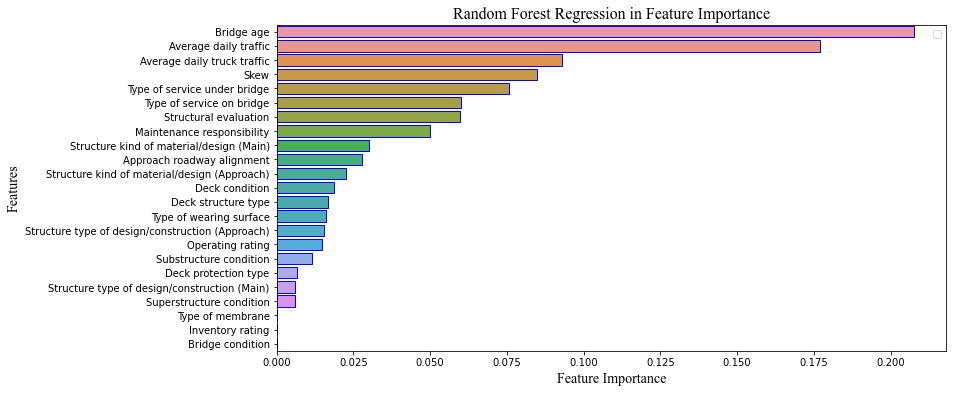

In [8]:
# Creating a bar plot
plt.figure(figsize=(12,6))
import numpy as np
sns.barplot(x=random_forest_regressor_feature_imp, y=random_forest_regressor_feature_imp.index, edgecolor = "Blue")
csfont = {'fontname':'Times New Roman'}

# Add labels to your graph
plt.xlabel('Feature Importance', fontsize=14, **csfont)
plt.ylabel('Features', fontsize=14,**csfont)

# plt.title("Visualizing Important Features", fontsize=16, fontweight="bold")
plt.title("Random Forest Regression in Feature Importance", fontsize=16, **csfont)
plt.legend()
plt.savefig("Importance RFR_2021.png", dpi=600, bbox_inches='tight')
plt.show()

# Recursive Feature Elimination (RFE) - RF

In [19]:
# Explore the number of selected features for RFE
from numpy import mean
from numpy import std

# from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

Model with Features: 1
MAE> -0.166 (0.020)
Model with Features: 2
MAE> -0.142 (0.016)
Model with Features: 3
MAE> -0.143 (0.015)
Model with Features: 4
MAE> -0.140 (0.016)
Model with Features: 5
MAE> -0.134 (0.015)
Model with Features: 6
MAE> -0.130 (0.015)
Model with Features: 7
MAE> -0.125 (0.014)
Model with Features: 8
MAE> -0.120 (0.015)
Model with Features: 9
MAE> -0.118 (0.014)
Model with Features: 10
MAE> -0.117 (0.014)
Model with Features: 11
MAE> -0.117 (0.013)
Model with Features: 12
MAE> -0.116 (0.014)
Model with Features: 13
MAE> -0.117 (0.013)
Model with Features: 14
MAE> -0.116 (0.013)
Model with Features: 15
MAE> -0.116 (0.014)
Model with Features: 16
MAE> -0.116 (0.014)
Model with Features: 17
MAE> -0.115 (0.013)
Model with Features: 18
MAE> -0.116 (0.014)
Model with Features: 19
MAE> -0.116 (0.013)
Model with Features: 20
MAE> -0.115 (0.014)
Model with Features: 21
MAE> -0.115 (0.013)
Model with Features: 22
MAE> -0.116 (0.013)
Model with Features: 23
MAE> -0.116 (0.01

No handles with labels found to put in legend.


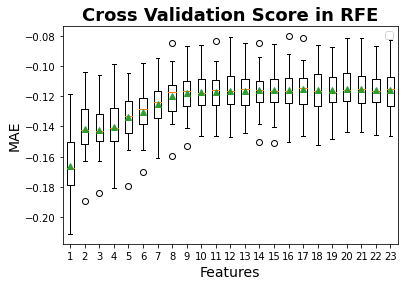

In [20]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,24):
        rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=i)
        model = RandomForestRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, Y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model,X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    print('Model with Features:', name)
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('MAE> %.3f (%.3f)' % (mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
plt.xlabel('Features', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title("Cross Validation Score in RFE", fontsize=18, fontweight="bold")
plt.legend()
plt.savefig("RFE-CV-RF 2021.png", dpi=600, bbox_inches='tight')
pyplot.show()

In [22]:
# define RFE
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=21)
# fit RFE
rfe.fit(X, Y)
# summarize all features
for i in range(X.shape[1]):
    print('Feature:, %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Feature:, 0, Selected True, Rank: 1.000
Feature:, 1, Selected True, Rank: 1.000
Feature:, 2, Selected True, Rank: 1.000
Feature:, 3, Selected True, Rank: 1.000
Feature:, 4, Selected True, Rank: 1.000
Feature:, 5, Selected True, Rank: 1.000
Feature:, 6, Selected True, Rank: 1.000
Feature:, 7, Selected True, Rank: 1.000
Feature:, 8, Selected True, Rank: 1.000
Feature:, 9, Selected True, Rank: 1.000
Feature:, 10, Selected True, Rank: 1.000
Feature:, 11, Selected True, Rank: 1.000
Feature:, 12, Selected True, Rank: 1.000
Feature:, 13, Selected True, Rank: 1.000
Feature:, 14, Selected True, Rank: 1.000
Feature:, 15, Selected True, Rank: 1.000
Feature:, 16, Selected True, Rank: 1.000
Feature:, 17, Selected True, Rank: 1.000
Feature:, 18, Selected True, Rank: 1.000
Feature:, 19, Selected False, Rank: 2.000
Feature:, 20, Selected True, Rank: 1.000
Feature:, 21, Selected True, Rank: 1.000
Feature:, 22, Selected False, Rank: 3.000


# Decision Tree

In [9]:
# Identify Feature Importance for DT Regression

# Feature Selection
from sklearn.tree import DecisionTreeRegressor

# define the model
model_dt = DecisionTreeRegressor()

# fit the model
model_dt.fit(X, Y)

# get importance
importance2 = model_dt.feature_importances_

# summarize feature importance
for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04961
Feature: 1, Score: 0.24195
Feature: 2, Score: 0.13398
Feature: 3, Score: 0.09485
Feature: 4, Score: 0.07523
Feature: 5, Score: 0.10671
Feature: 6, Score: 0.01973
Feature: 7, Score: 0.01029
Feature: 8, Score: 0.02787
Feature: 9, Score: 0.01334
Feature: 10, Score: 0.01796
Feature: 11, Score: 0.00103
Feature: 12, Score: 0.00932
Feature: 13, Score: 0.01337
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.05131
Feature: 16, Score: 0.02186
Feature: 17, Score: 0.01000
Feature: 18, Score: 0.01032
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00601
Feature: 21, Score: 0.08527
Feature: 22, Score: 0.00000


In [10]:
#Sorting in ascending order
decision_tree_regressor_feature_imp = pd.Series(model_dt.feature_importances_,index=X.columns).sort_values(ascending=False)
decision_tree_regressor_feature_imp

Bridge age                                          2.419512e-01
Average daily traffic                               1.339827e-01
Type of service under bridge                        1.067140e-01
Skew                                                9.485442e-02
Average daily truck traffic                         8.526506e-02
Type of service on bridge                           7.522915e-02
Structural evaluation                               5.130627e-02
Maintenance responsibility                          4.960818e-02
Structure kind of material/design (Approach)        2.787011e-02
Approach roadway alignment                          2.185773e-02
Structure kind of material/design (Main)            1.972966e-02
Deck condition                                      1.796026e-02
Operating rating                                    1.337109e-02
Structure type of design/construction (Approach)    1.333614e-02
Type of wearing surface                             1.031815e-02
Structure type of design/

No handles with labels found to put in legend.


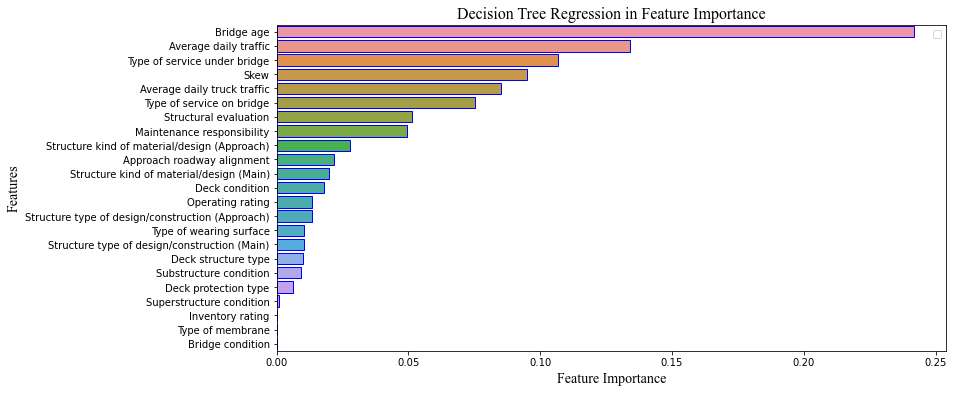

In [11]:
# Creating a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=decision_tree_regressor_feature_imp, y=decision_tree_regressor_feature_imp.index, edgecolor = "Blue")
csfont = {'fontname':'Times New Roman'}

# Add labels to your graph
plt.xlabel('Feature Importance', fontsize=14, **csfont)
plt.ylabel('Features', fontsize=14, **csfont)

# plt.title("Visualizing Important Features", fontsize=16, fontweight="bold")
plt.title("Decision Tree Regression in Feature Importance", fontsize=16, **csfont)
plt.legend()
plt.savefig("Importance DT 2021.png", dpi=600, bbox_inches='tight')
plt.show()

# Recursive Feature Elimination (RFE) - DT

Model with Features: 1
MAE> -0.165 (0.024)
Model with Features: 2
MAE> -0.137 (0.023)
Model with Features: 3
MAE> -0.133 (0.026)
Model with Features: 4
MAE> -0.125 (0.024)
Model with Features: 5
MAE> -0.119 (0.025)
Model with Features: 6
MAE> -0.117 (0.025)
Model with Features: 7
MAE> -0.111 (0.027)
Model with Features: 8
MAE> -0.106 (0.024)
Model with Features: 9
MAE> -0.102 (0.024)
Model with Features: 10
MAE> -0.102 (0.024)
Model with Features: 11
MAE> -0.101 (0.021)
Model with Features: 12
MAE> -0.100 (0.020)
Model with Features: 13
MAE> -0.100 (0.020)
Model with Features: 14
MAE> -0.100 (0.018)
Model with Features: 15
MAE> -0.100 (0.020)
Model with Features: 16
MAE> -0.099 (0.018)
Model with Features: 17
MAE> -0.100 (0.020)
Model with Features: 18
MAE> -0.099 (0.017)
Model with Features: 19
MAE> -0.097 (0.019)
Model with Features: 20
MAE> -0.098 (0.020)
Model with Features: 21
MAE> -0.097 (0.018)
Model with Features: 22
MAE> -0.099 (0.017)
Model with Features: 23
MAE> -0.100 (0.01

No handles with labels found to put in legend.


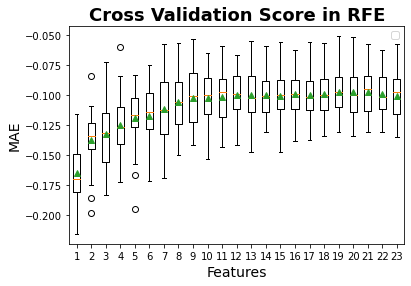

In [26]:
# get a list of models to evaluate
def get_models2():
    models2 = dict()
    for i in range(1,24):
        rfe2 = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model2 = DecisionTreeRegressor()
        models2[str(i)] = Pipeline(steps=[('s',rfe2),('m',model2)])
    return models2

# evaluate a given model using cross-validation
def evaluate_model2(model2, X, Y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores2 = cross_val_score(model2,X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores2

# get the models to evaluate
models2 = get_models2()

# evaluate the models and store results
results2, names2 = list(), list()
for name2, model2 in models2.items():
    print('Model with Features:', name2)
    scores2 = evaluate_model2(model2, X, Y)
    results2.append(scores2)
    names2.append(name2)
    print('MAE> %.3f (%.3f)' % (mean(scores2), std(scores2)))
    
# plot model performance for comparison
pyplot.boxplot(results2, labels=names2, showmeans=True)
plt.xlabel('Features', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title("Cross Validation Score in RFE", fontsize=18, fontweight="bold")
plt.legend()
plt.savefig("RFE-CV-DT 2021.png", dpi=600, bbox_inches='tight')
pyplot.show()

In [28]:
# define RFE
rfe2 = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=21)
# fit RFE
rfe2.fit(X, Y)
# summarize all features
for i in range(X.shape[1]):
    print('Feature:, %d, Selected %s, Rank: %.3f' % (i, rfe2.support_[i], rfe2.ranking_[i]))

Feature:, 0, Selected True, Rank: 1.000
Feature:, 1, Selected True, Rank: 1.000
Feature:, 2, Selected True, Rank: 1.000
Feature:, 3, Selected True, Rank: 1.000
Feature:, 4, Selected True, Rank: 1.000
Feature:, 5, Selected True, Rank: 1.000
Feature:, 6, Selected True, Rank: 1.000
Feature:, 7, Selected True, Rank: 1.000
Feature:, 8, Selected True, Rank: 1.000
Feature:, 9, Selected True, Rank: 1.000
Feature:, 10, Selected True, Rank: 1.000
Feature:, 11, Selected True, Rank: 1.000
Feature:, 12, Selected True, Rank: 1.000
Feature:, 13, Selected True, Rank: 1.000
Feature:, 14, Selected True, Rank: 1.000
Feature:, 15, Selected True, Rank: 1.000
Feature:, 16, Selected True, Rank: 1.000
Feature:, 17, Selected True, Rank: 1.000
Feature:, 18, Selected True, Rank: 1.000
Feature:, 19, Selected False, Rank: 2.000
Feature:, 20, Selected True, Rank: 1.000
Feature:, 21, Selected True, Rank: 1.000
Feature:, 22, Selected False, Rank: 3.000
